In [1]:
# Company data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
clinic_data=pd.read_csv("clinic.csv")
procedures_data=pd.read_csv("procedure.csv")
inquries_data=pd.read_csv("inquirieS.csv")
bookings_data=pd.read_csv("booking.csv")
user_data=pd.read_csv("Users.csv")


In [3]:
print("TheFirst inquries post by person is :")
inquries_data[inquries_data['created_at']=='2014-04-01']
inquries_data.rename(columns={'created_at':'inqurie_created_at'})
inquries_data.head(5)

TheFirst inquries post by person is :


,inquiry_id,user_id,procedure_id,created_at,clinic_id
0,269,761,1,8/18/2014,5
1,1218,2714,1,6/28/2014,4
2,1769,223,53,11/16/2014,16
3,2640,2768,45,11/6/2014,5
4,94,2286,53,8/7/2014,1


In [4]:
clinic_data.rename(columns={'created_at':'clinic_created_at'})
clinic_data.head(1)

,clinic_id,name,country,created_at,updated_at,currency_code,status,account_manager,hidden,city,facilitator_name
0,1,Bangkok International Center,Thailand,2014-03-05 16:06,2014-03-07 10:08,THB,status_clinic_approved,Joe,0,Bangkok,Matchaya


In [5]:
user_data.rename(columns={'country':'user_country'})
user_data.head(5)

,user_id,first_name,last_name,email,country,language,phone_code,created_at
0,1,Shawn,Kelly,skelly1ba@cnbc.com,france,french,33,2014-11-25
1,2,Juan,Banks,jbanks1l7@barnesandnoble.com,australia,english,61,2014-10-09
2,3,Linda,Davis,ldavis1by@wikimedia.org,france,english,33,2014-11-19
3,4,Pamela,Gilbert,pgilbert27s@princeton.edu,united kingdom,english,44,2014-04-05
4,5,Albert,Kelly,akellyg9@miibeian.gov.cn,sweden,english,46,2014-11-26


In [6]:
bookings_data.rename(columns={'created_at':'booking_created_at'})
bookings_data.head(5)

,inquiry_id,credit_card_type,status,booking_id,created_at
0,269,AMEX,completed,1,2014-09-05
1,1218,visa,cancelled,2,2014-07-03
2,1769,visa,scheduled,3,2014-11-20
3,2640,AMEX,completed,4,2015-01-05
4,94,mastercard,scheduled,5,2014-08-16


In [7]:
procedures_data.rename(columns={'created_at':'procedure_created_at'})
procedures_data.head(5)

,procedure_id,procedure_name,category_name,created_at,updated_at
0,1,Breast Implants,Plastic and Cosmetic Surgery,2014-03-07 14:48,2014-07-17 14:52
1,2,Assisted Breathing,Accident and Emergency Medicine,2014-03-07 14:48,2014-07-17 14:52
2,3,Critical Care,Accident and Emergency Medicine,2014-03-07 14:48,2014-07-17 14:52
3,4,Deep Wound Treatment,Accident and Emergency Medicine,2014-03-07 14:48,2014-07-17 14:52
4,5,Allergology Consultation,Allergology,2014-03-07 14:48,2014-07-17 14:03


In [8]:
user_inquries=pd.merge(user_data,inquries_data,on='user_id',how='inner')
user_inquries_booking=pd.merge(user_inquries,bookings_data,on='inquiry_id',how='inner')
user_inquries_booking_clinic=pd.merge(user_inquries_booking,clinic_data,on='clinic_id',how='inner')
user_inquries_booking_clinic_procedures=pd.merge(user_inquries_booking_clinic,procedures_data,on='procedure_id',how='inner')

All_csv=user_inquries_booking_clinic_procedures


In [9]:
All_csv.isnull().sum()

user_id             0
first_name          0
last_name           0
email               0
country_x           0
language            0
phone_code          0
created_at_x        0
inquiry_id          0
procedure_id        0
created_at_y        0
clinic_id           0
credit_card_type    0
status_x            0
booking_id          0
created_at_x        0
name                0
country_y           0
created_at_y        0
updated_at_x        0
currency_code       0
status_y            0
account_manager     0
hidden              0
city                0
facilitator_name    0
procedure_name      0
category_name       0
created_at          0
updated_at_y        0
dtype: int64

26.528257131576538
459
20.588235557079315
357
19.607843458652496
340
14.936563372612
259
11.014994233846664
191
7.3241062462329865
127


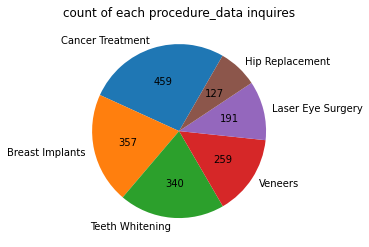

In [10]:
def calc(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    print(pct)
    print(absolute)
    return absolute


procedure=All_csv['procedure_name'].value_counts().values
label = All_csv['procedure_name'].value_counts().index 

colors = ['yellow', 'red', 'green', 'blue', 'purple','black']

plt.pie(procedure,labels=label,autopct=lambda pct: calc(pct, procedure),startangle=60)
plt.title("count of each procedure_data inquires")
plt.show()

Int64Index([37, 1, 53, 24, 45, 15], dtype='int64')
[460 357 340 259 191 127]


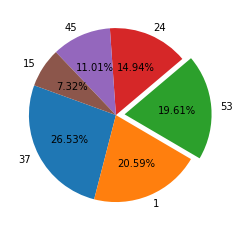

In [11]:
explode = [0, 0, 0.1, 0, 0,0]
labels =All_csv['procedure_id'].value_counts().index
sizes =All_csv['procedure_id'].value_counts().values
print(labels)
print(sizes)

plt.pie(sizes,labels=labels,autopct='%1.2f%%',explode=explode,startangle=160)
plt.show()


In [12]:
x=All_csv['status_x'].value_counts()
#print(x)

In [13]:
Cancer_Treatment=All_csv[All_csv['procedure_name']=='Cancer Treatment']
Breast_Implants=All_csv[All_csv['procedure_name']=='Breast Implants']
Teeth_Whitening=All_csv[All_csv['procedure_name']=='Teeth Whitening']
Veneers=All_csv[All_csv['procedure_name']=='Veneers']
Laser_Eye_Surgery=All_csv[All_csv['procedure_name']=='Laser Eye Surgery']
Hip_Replacement=All_csv[All_csv['procedure_name']=='Hip Replacement']
#............................................................................
CancerTreatment=Cancer_Treatment['status_x'].value_counts()
BreastImplants=Breast_Implants['status_x'].value_counts()
  TeethWhitening=Teeth_Whitening['status_x'].value_counts()
veneers=Veneers['status_x'].value_counts()
LaserEyeSurgery=Laser_Eye_Surgery['status_x'].value_counts()
HipReplacement=Hip_Replacement['status_x'].value_counts()

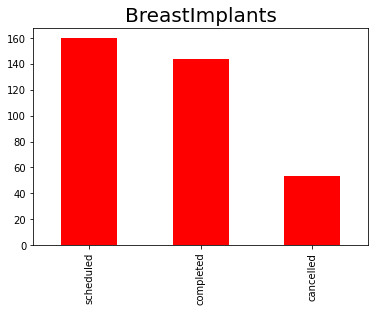

In [14]:
b=Breast_Implants['status_x'].value_counts().plot.bar(color = 'red')
b.set_title('BreastImplants', fontsize = 20)
plt.show()

In [15]:
BreastImplants=Breast_Implants['status_x'].value_counts()
BreastImplants

scheduled    160
completed    144
cancelled     53
Name: status_x, dtype: int64

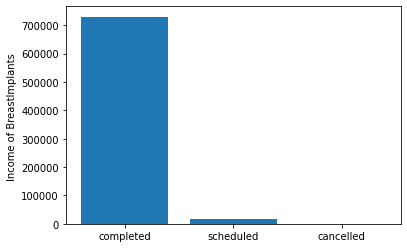

In [16]:
# BreastImplement Income
# Breast Implants: €5,000 if complete
# Breast Implants: €100 if cancel
status=['completed','scheduled','cancelled']
BreastImplants_completed=5000*144 + 100*100
BreastImplants_scdeule=160*100
BreastImplants_cancelled=53*0
income=[BreastImplants_completed,BreastImplants_scdeule,BreastImplants_cancelled]
plt.bar(status,income)
plt.ylabel("Income of BreastImplants ")
plt.show()




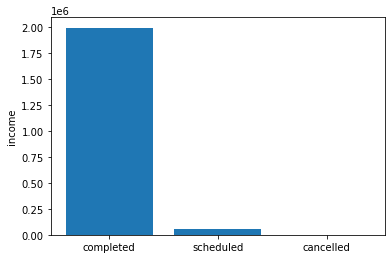

In [17]:
 #CancerTreatment Income
#CancerTreatment: €9,000 if complete
# CancerTreatment: €300 if cancel
Cancer_Treatmente_completed=9000*214+214*300
Cancer_Treatmente_scdeule=198*300
Cancer_Treatmente_cancelled=48*0
incomec=[Cancer_Treatmente_completed,Cancer_Treatmente_scdeule,Cancer_Treatmente_cancelled]
plt.bar(status,incomec)
plt.ylabel("income")
plt.show()


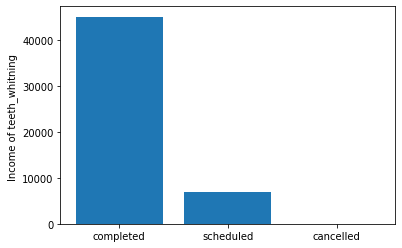

In [18]:
 #teeth_whitning Income
#teeth_whitning: €250 if complete
# teeth_whitning: €300 if cancel
teeth_whitning_completed=250*150+150*50
teeth_whitning_scdeule=138*50
teeth_whitning_cancelled=52*0
incomet=[teeth_whitning_completed,teeth_whitning_scdeule,teeth_whitning_cancelled]
plt.bar(status,incomet)
plt.ylabel("Income of teeth_whitning ")
plt.show()

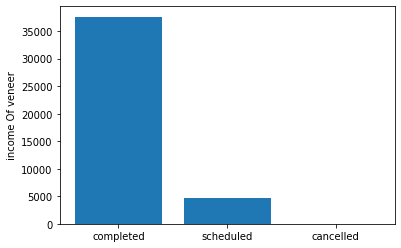

In [19]:
 #veneer Income
#veneer income: €300 if complete
# veneer income: €45 if cancel
veneer_completed=300*109+109*45
veneer_scdeule=104*45
veneer_cancelled=46*0
incomev=[veneer_completed,veneer_scdeule,veneer_cancelled]
plt.bar(status,incomev)
plt.ylabel("income Of veneer")
plt.show()

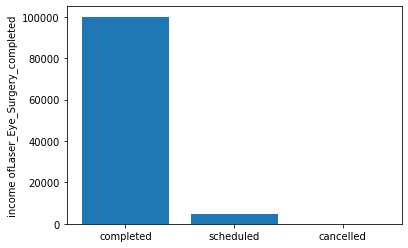

In [20]:
 #Laser_Eye_Surgery
#Laser_Eye_Surgery income: €100 if complete
# Laser_Eye_Surgery income: €75 if cancel
Laser_Eye_Surgery_completed=1000*93+93*75
Laser_Eye_Surgery_scdeule=63*75
Laser_Eye_Surgery_cancelled=35*0
income=[Laser_Eye_Surgery_completed,Laser_Eye_Surgery_scdeule,Laser_Eye_Surgery_cancelled]
plt.bar(status,income)
plt.ylabel("income ofLaser_Eye_Surgery_completed")
plt.show()

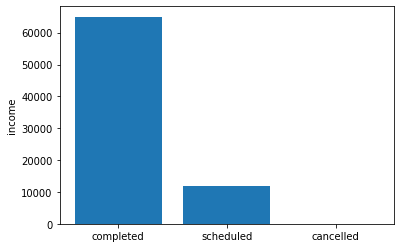

In [21]:
 #HipReplacement
#HipReplacement income: €1000 if complete
# HipReplacement income: €250 if cancel
HipReplacement_completed=1000*52+52*250
HipReplacement_scdeule=250*47
HipReplacement_cancelled=28*0
income=[HipReplacement_completed,HipReplacement_scdeule,HipReplacement_cancelled]
plt.bar(status,income)
plt.ylabel("income")
plt.show()

In [22]:
#CancerTreatment
#BreastImplants
#TeethWhitening
#veneers
#LaserEyeSurgery
HipReplacement

completed    52
scheduled    47
cancelled    28
Name: status_x, dtype: int64

In [23]:
cost_CancerTreatment=214*9000+214*300+198*300
cost_BreastImplants=144*5000+144*100+160*100
cost_HipReplacement=52*10000+52*250+47*250
cost_TeethWhitening=150*250+150*50+138*50
cost_LaserEyeSurgery=93*1000+93*75+63*75
cost_veneers=109*300+109*300+104*45

print("Average Basket Value and Average CPI  procedures (EUR) for cancer tretment  ",'€',cost_CancerTreatment)
print("Average Basket Value and Average CPI  procedures (EUR) for BreastImplants  ",'€',cost_BreastImplants)
print("Average Basket Value and Average CPI  procedures (EUR) for HipReplacement  ",'€',cost_HipReplacement)
print("Average Basket Value and Average CPI  procedures (EUR) for TeethWhitening  ",'€',cost_TeethWhitening)
print("Average Basket Value and Average CPI  procedures (EUR) for LaserEyeSurgery  ",'€',cost_LaserEyeSurgery)
print("Average Basket Value and Average CPI  procedures (EUR) for veneers  ",'€',cost_veneers)


Average Basket Value and Average CPI  procedures (EUR) for cancer tretment   € 2049600
Average Basket Value and Average CPI  procedures (EUR) for BreastImplants   € 750400
Average Basket Value and Average CPI  procedures (EUR) for HipReplacement   € 544750
Average Basket Value and Average CPI  procedures (EUR) for TeethWhitening   € 51900
Average Basket Value and Average CPI  procedures (EUR) for LaserEyeSurgery   € 104700
Average Basket Value and Average CPI  procedures (EUR) for veneers   € 70080


c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


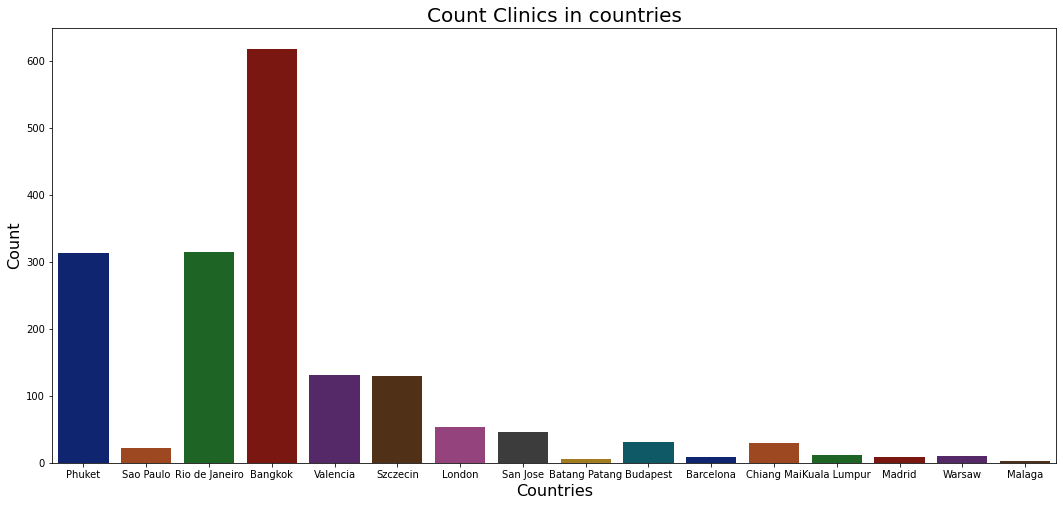

In [24]:
# count clininc in countries
City=All_csv['city']
plt.figure(figsize = (18, 8))
ax=sns.countplot(City, palette = 'dark')
ax.set_title(label = 'Count Clinics in countries', fontsize = 20)
ax.set_xlabel(xlabel = 'Countries', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

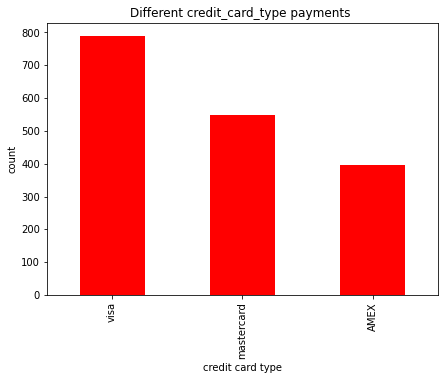

In [25]:
credit_card_type=All_csv['credit_card_type'].value_counts().plot.bar(color = 'red', figsize = (7, 5))
credit_card_type.set_title('Different credit_card_type payments ')
plt.xlabel('credit card type')
plt.ylabel('count')
plt.show()

In [26]:
x=All_csv['category_name'].value_counts()
x

Dentistry                       599
Oncology                        460
Plastic and Cosmetic Surgery    357
Ophthalmology                   191
Orthopedics                     127
Name: category_name, dtype: int64

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


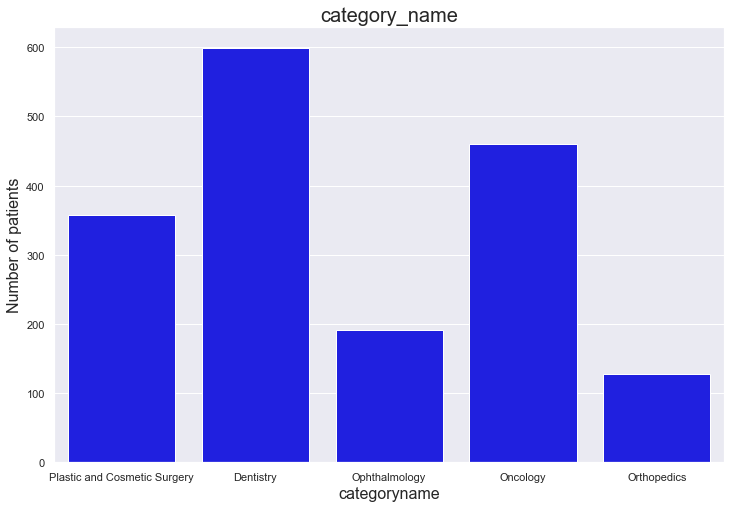

In [27]:
sns.set(style = "darkgrid", palette = "gist_heat", color_codes = True)
x = All_csv.category_name
plt.figure(figsize = (12,8))
ax = sns.countplot(x, color = 'blue')
ax.set_xlabel(xlabel = "categoryname", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of patients', fontsize = 16)
ax.set_title(label = 'category_name', fontsize = 20)
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


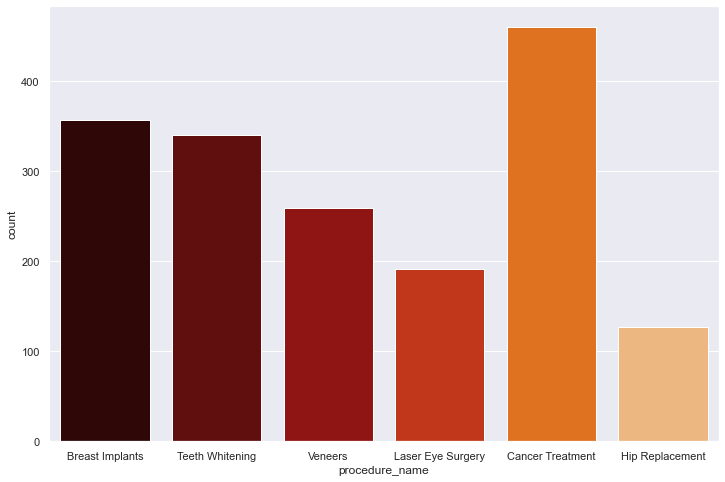

In [28]:
plt.figure(figsize = (12,8))
procedure_name=All_csv['procedure_name']
sns.countplot(procedure_name)
plt.show()

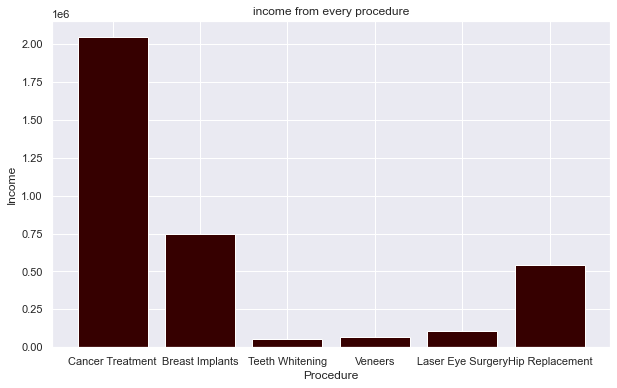

In [29]:
procedurename=All_csv['procedure_name'].value_counts()
procedurename=['Cancer Treatment','Breast Implants','Teeth Whitening','Veneers','Laser Eye Surgery','Hip Replacement']
ammount=[2049600,750400,51900,70080,104700,544750]
plt.figure(figsize = (10, 6))
plt.bar(procedurename,ammount)
plt.title("income from every procedure")
plt.xlabel("Procedure")
plt.ylabel("Income")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


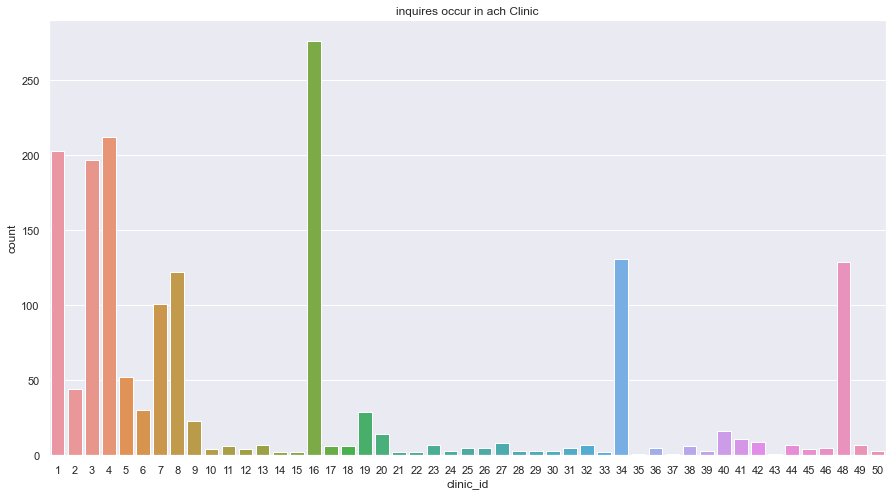

In [30]:
clinicinquiries=All_csv.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=All_csv['clinic_id']
sns.countplot(x)
plt.title("inquires occur in ach Clinic")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


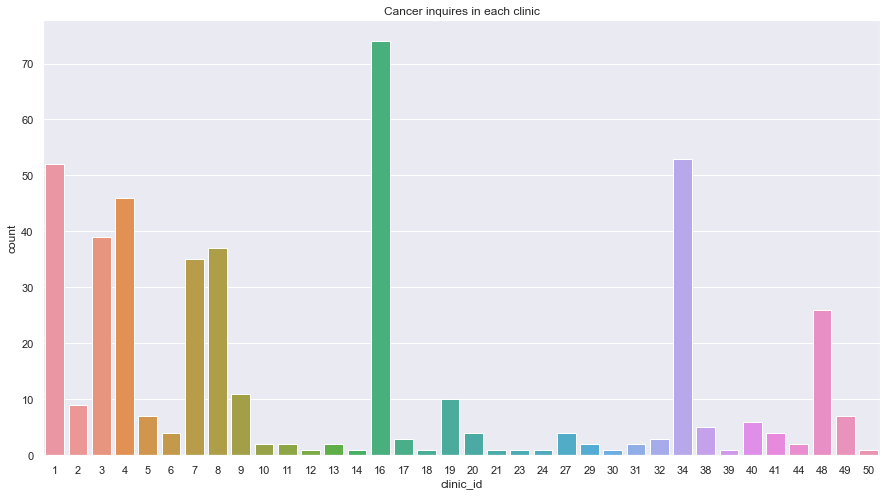

In [31]:
clinicinquiries=Cancer_Treatment.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Cancer_Treatment['clinic_id']
sns.countplot(x)
plt.title("Cancer inquires in each clinic")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


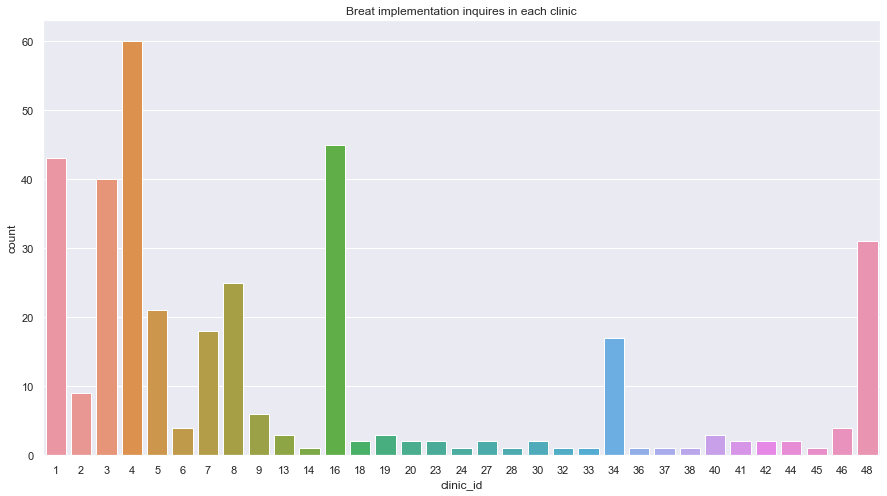

In [32]:
clinicinquiries=Breast_Implants.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Breast_Implants['clinic_id']
sns.countplot(x)
plt.title("Breat implementation inquires in each clinic")

plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


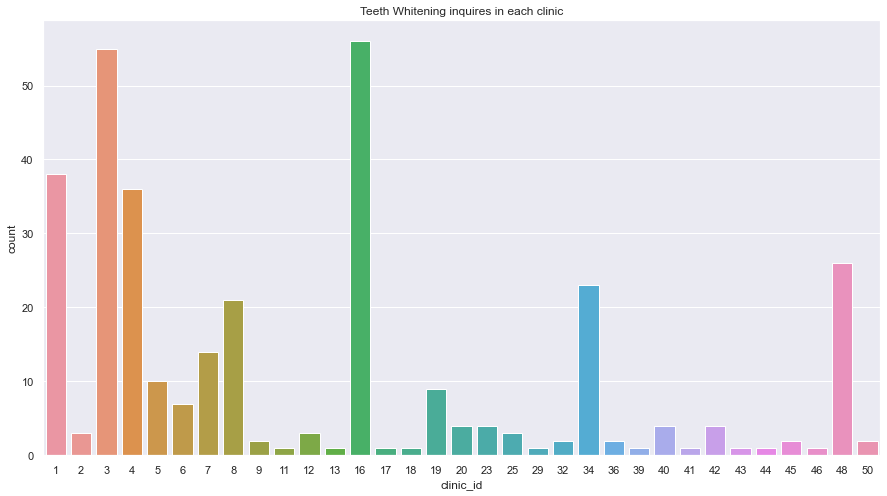

In [33]:
clinicinquiries=Teeth_Whitening.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Teeth_Whitening['clinic_id']
sns.countplot(x)
plt.title("Teeth Whitening inquires in each clinic")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


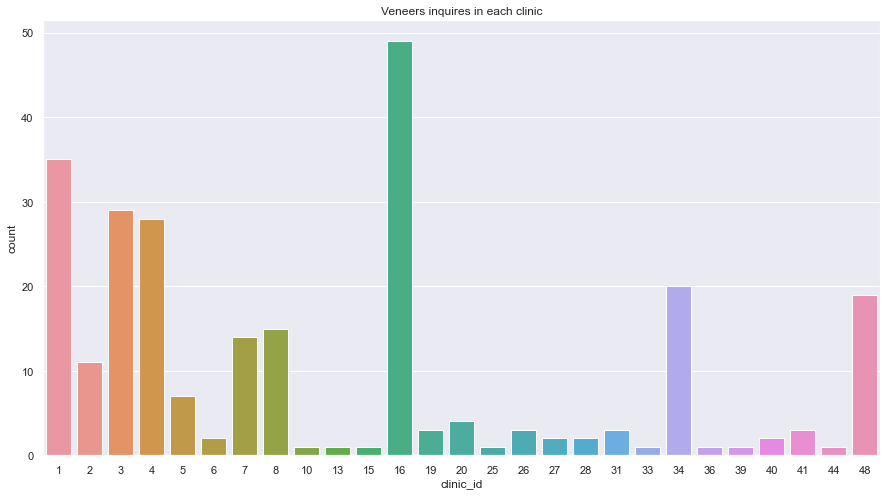

In [34]:
clinicinquiries=Veneers.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Veneers['clinic_id']
sns.countplot(x)
plt.title("Veneers inquires in each clinic")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


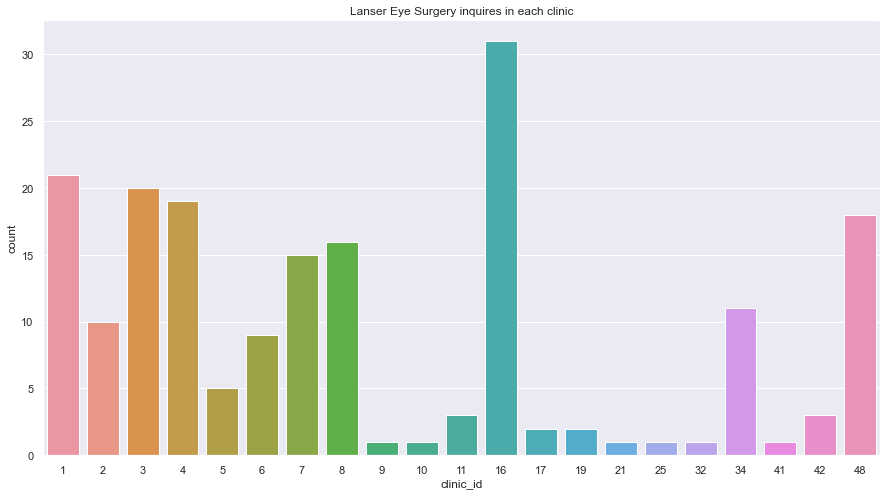

In [35]:
clinicinquiries=Laser_Eye_Surgery.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Laser_Eye_Surgery['clinic_id']
sns.countplot(x)
plt.title("Lanser Eye Surgery inquires in each clinic")
plt.show()

c:\users\vikas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


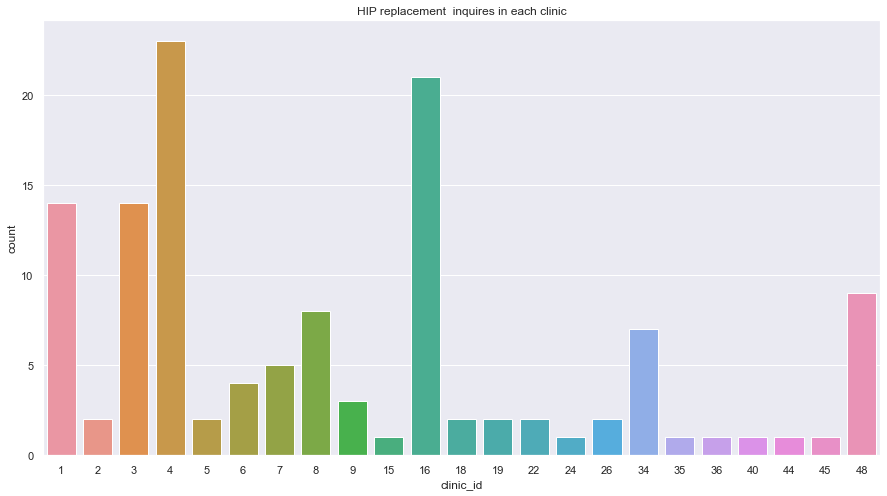

In [36]:
clinicinquiries=Hip_Replacement.groupby("clinic_id")['inquiry_id'].count()
plt.figure(figsize = (15, 8))
x=Hip_Replacement['clinic_id']
sns.countplot(x)
plt.title("HIP replacement  inquires in each clinic")
plt.show()

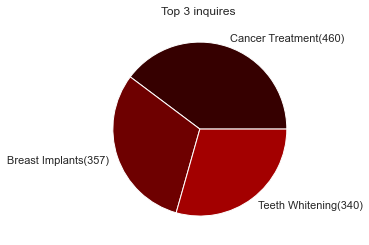

In [37]:
#What are the top 3 inquired procedures overall?
top3enquireies=All_csv['procedure_name'].value_counts().sort_values(ascending=False).head(3)
top3enquireies
plt.pie(top3enquireies,labels=['Cancer Treatment(460)','Breast Implants(357)','Teeth Whitening(340)'])
plt.title("Top 3 inquires ")
plt.show()

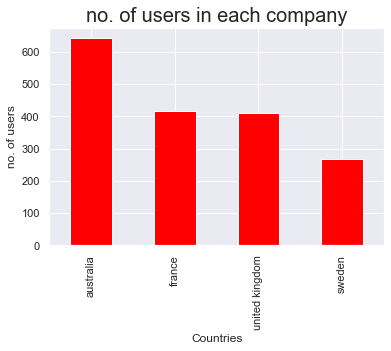

In [41]:
usercountry=All_csv['country_x'].value_counts()
usercountry
usercountry.plot.bar(color = 'red')
plt.title('no. of users in each company', fontsize = 20)
plt.xlabel("Countries")
plt.ylabel("no. of users")
plt.show()